In [3]:
#The purpose of this study is to find what jobs are currently on the rise with the introduction of AI

In [4]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

In [6]:
from collections import Counter

In [7]:
import seaborn as sns

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv('data/final_job_list.csv')

In [10]:
data.head()

,Title,Company,Location,Type of Positions,Job Description,Salary,Identified_Skills
0,"Staff Applied Scientist, Marketplace",ThredUp Inc.,CA,Full-time,\nAbout thredUP thredUP is transforming resale...,190000.0,"['python', 'machine learning', 'aws', 'sql']"
1,Prompt Engineer for Generative AI (chatbot and...,Vicarious Talent Agency,WA,Full-time,"We are Vicarious, a talent agency that represe...",70000.0,"['python', 'machine learning', 'deep learning'..."
2,Data Systems Analyst/Architect,General Dynamics Information Technology,Remote,Full-time,Clearance Level None Category Data Science Loc...,104000.0,"['machine learning', 'aws', 'azure', 'nosql', ..."
3,AIOps Principle Data Scientist,CVS Health,CT,Full-time,\nBring your heart to CVS Health. Every one of...,140000.0,"['python', 'machine learning', 'aws', 'gcp']"
4,Sr. Data Scientist,Altak Group,Remote,Full-time,Job Summary:\nWe are seeking an experienced Da...,136000.0,"['python', 'machine learning', 'tableau', 'aws..."


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692 entries, 0 to 691
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              692 non-null    object 
 1   Company            692 non-null    object 
 2   Location           692 non-null    object 
 3   Type of Positions  692 non-null    object 
 4   Job Description    692 non-null    object 
 5   Salary             692 non-null    float64
 6   Identified_Skills  692 non-null    object 
dtypes: float64(1), object(6)
memory usage: 38.0+ KB


In [12]:
data.isnull().sum()

Title                0
Company              0
Location             0
Type of Positions    0
Job Description      0
Salary               0
Identified_Skills    0
dtype: int64

In [13]:
data.describe()

,Salary
count,692.000000
mean,131428.635838
std,39712.952798
min,4145.000000
25%,101000.000000
50%,149532.000000
75%,160000.000000
max,268000.000000


In [14]:
duplicates = data.duplicated().sum()
print(f"Total duplicate rows: {duplicates}")

Total duplicate rows: 401


In [15]:
data.drop_duplicates(inplace=True)

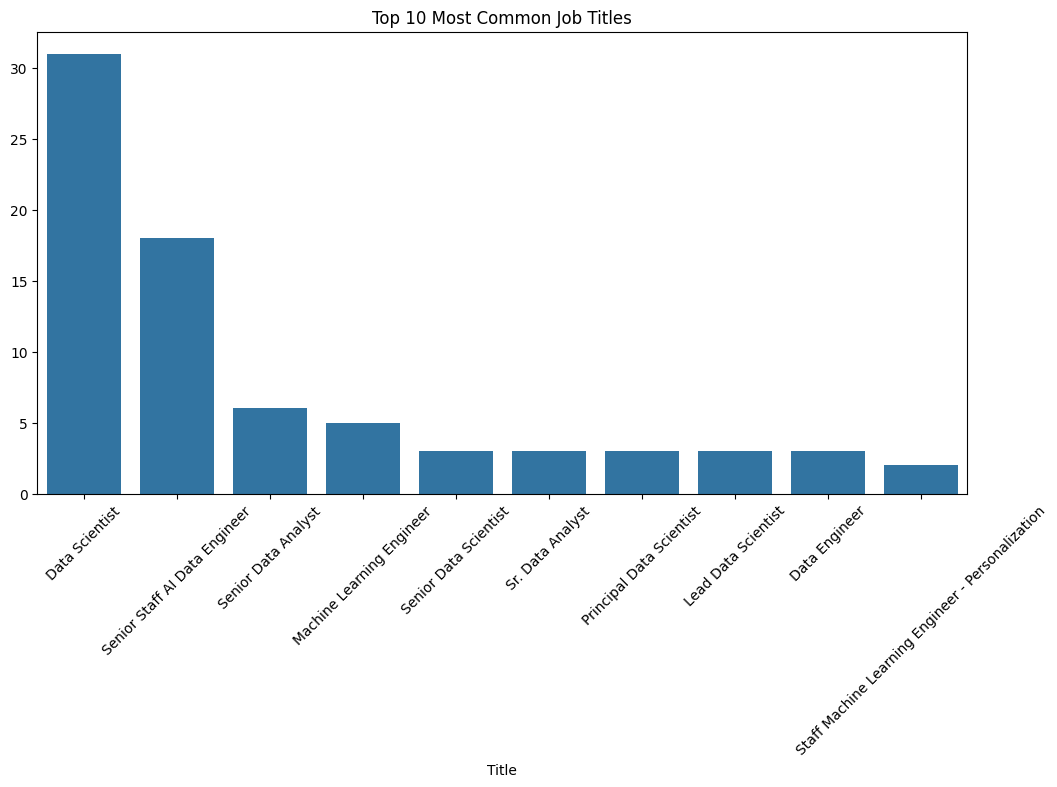

In [16]:
#Top 10 most common job titles

top_jobs = data['Title'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_jobs.index, y=top_jobs.values)
plt.title("Top 10 Most Common Job Titles")
plt.xticks(rotation=45)
plt.show()

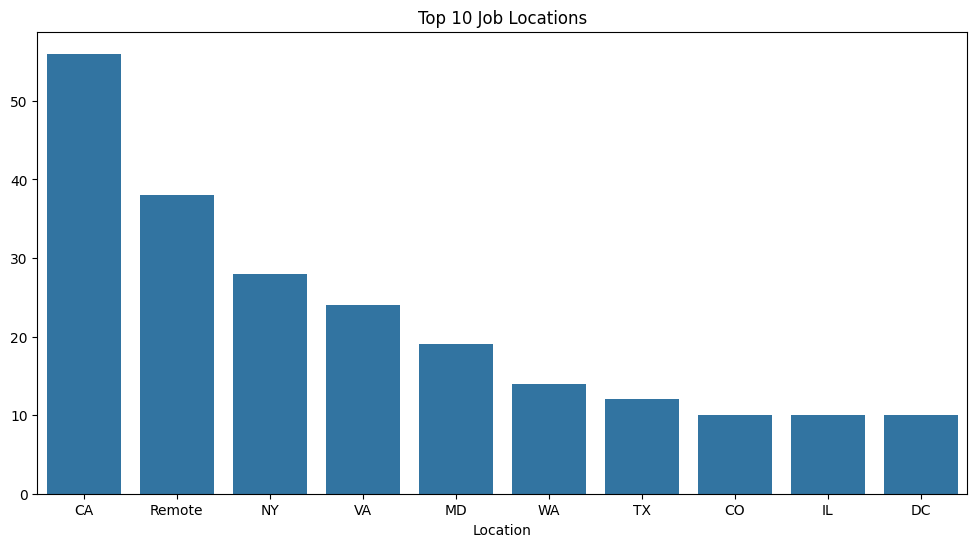

In [17]:
#Top 10 job locations

top_locations = data['Location'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_locations.index, y=top_locations.values)
plt.title("Top 10 Job Locations")
plt.show()

In [18]:
skills = data['Identified_Skills'].str.split(',').sum()
skill_counts = Counter(skills)
top_skills = skill_counts.most_common(10)

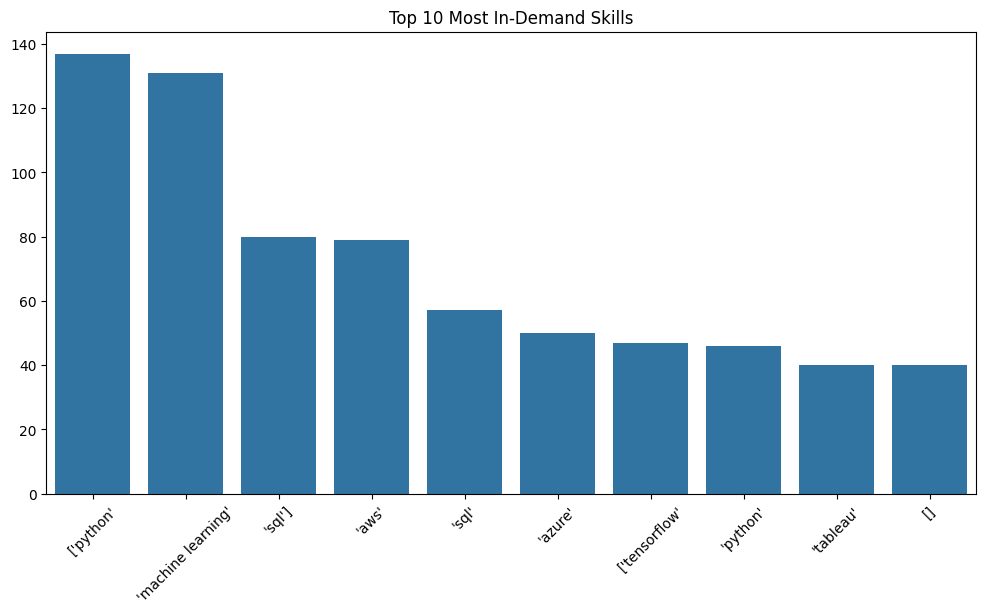

In [19]:
# Top 10 identified skills
plt.figure(figsize=(12, 6))
sns.barplot(x=[skill[0].strip() for skill in top_skills], y=[skill[1] for skill in top_skills])
plt.title("Top 10 Most In-Demand Skills")
plt.xticks(rotation=45)
plt.show()

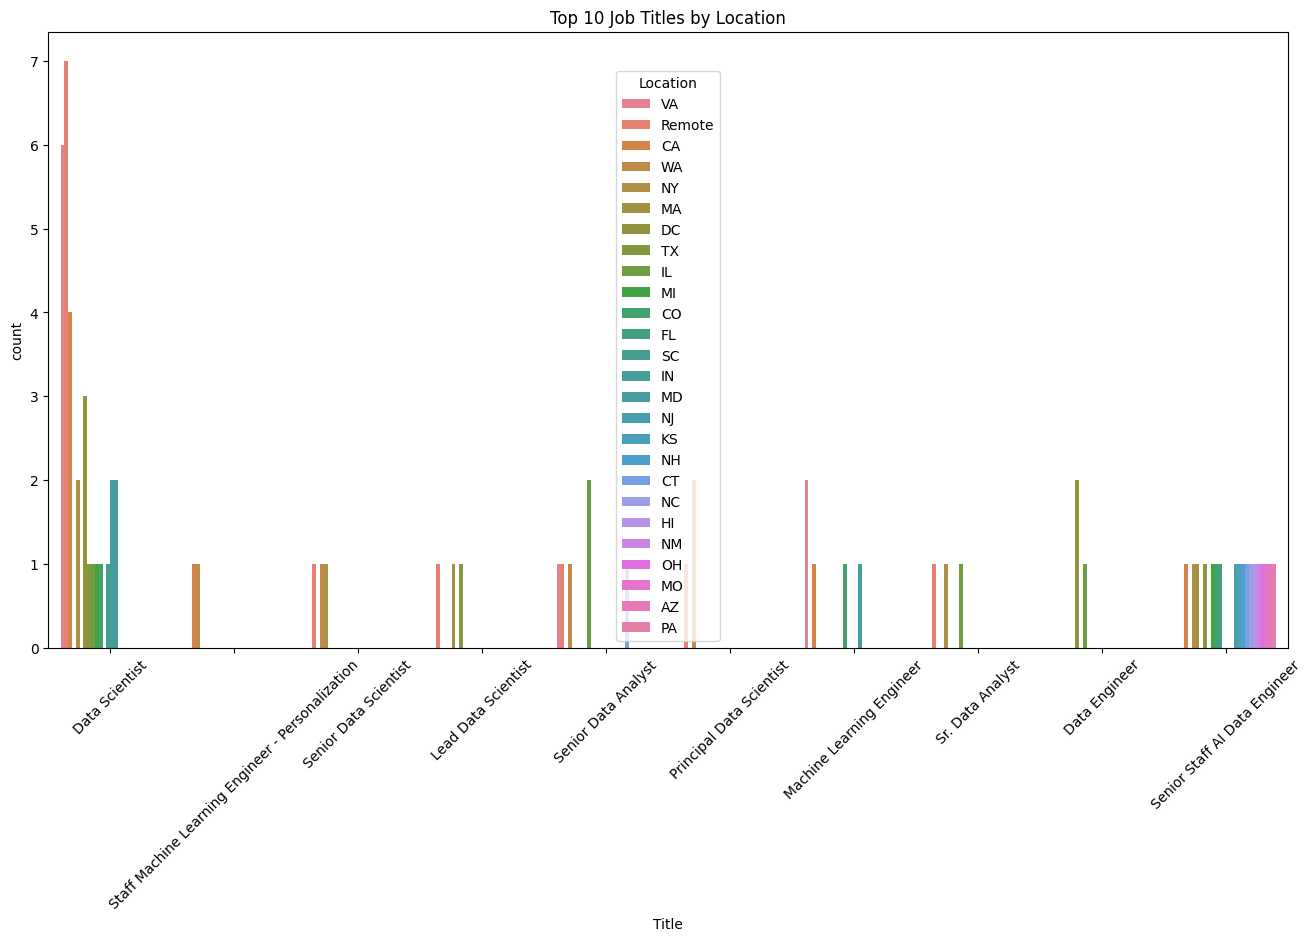

In [20]:
# Which job titles are most common in different locations:

# Top 10 job titles
top_10_titles = data['Title'].value_counts().nlargest(10).index

# Filter data 
top_title_data = data[data['Title'].isin(top_10_titles)]

plt.figure(figsize=(16, 8))
sns.countplot(data=top_title_data, x='Title', hue='Location')
plt.title("Top 10 Job Titles by Location")
plt.xticks(rotation=45)
plt.show()


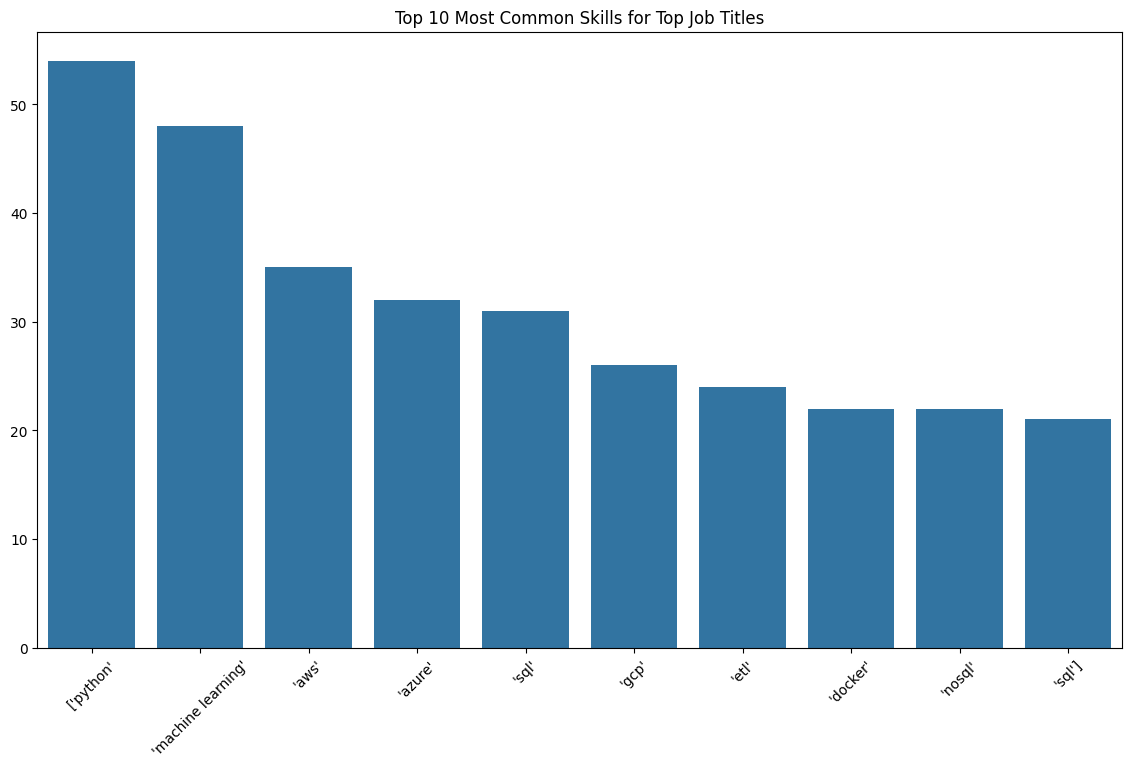

In [21]:
# Focus only on top 10 job titles
top_title_skills = data[data['Title'].isin(top_10_titles)]['Identified_Skills'].str.split(',').sum()
skill_counts = Counter([skill.strip() for skill in top_title_skills])

# Get the top 10 most common skills for these titles
top_skills = skill_counts.most_common(10)

plt.figure(figsize=(14, 8))
sns.barplot(x=[skill[0] for skill in top_skills], y=[skill[1] for skill in top_skills])
plt.title("Top 10 Most Common Skills for Top Job Titles")
plt.xticks(rotation=45)
plt.show()

In [24]:
# Combine all skills into a single string
all_skills = ' '.join(data['Identified_Skills'].dropna())

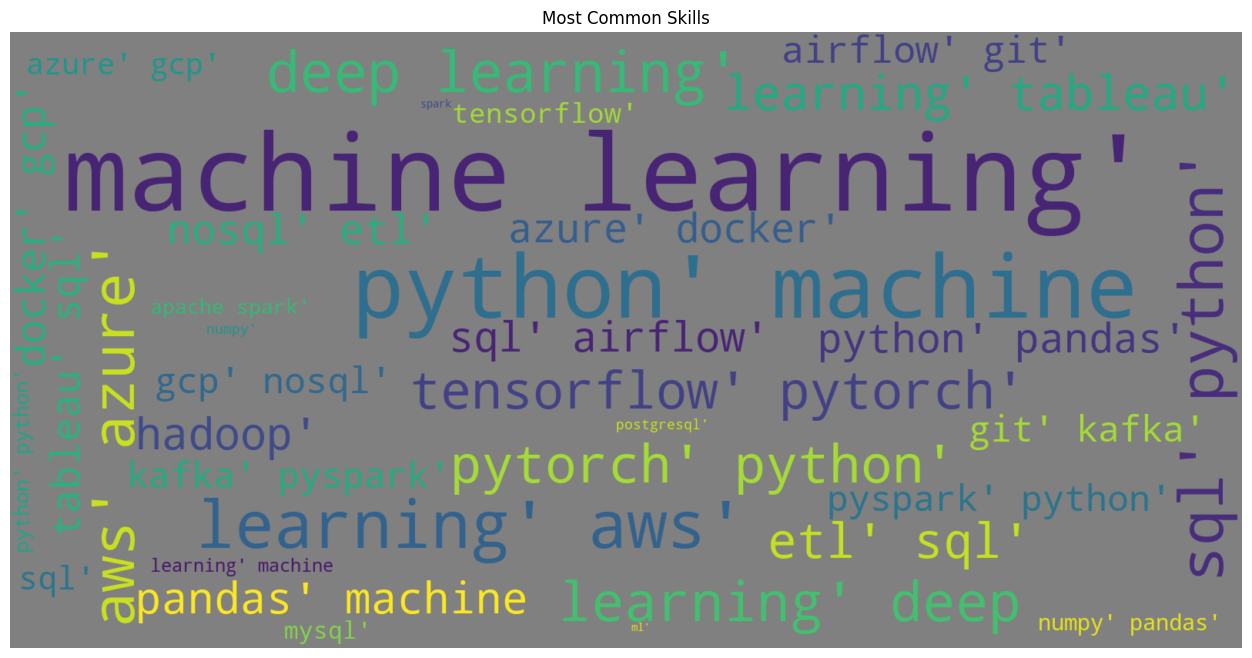

In [26]:
wordcloud = WordCloud(width=1600, height=800, background_color='gray').generate(all_skills)
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Skills")
plt.show()

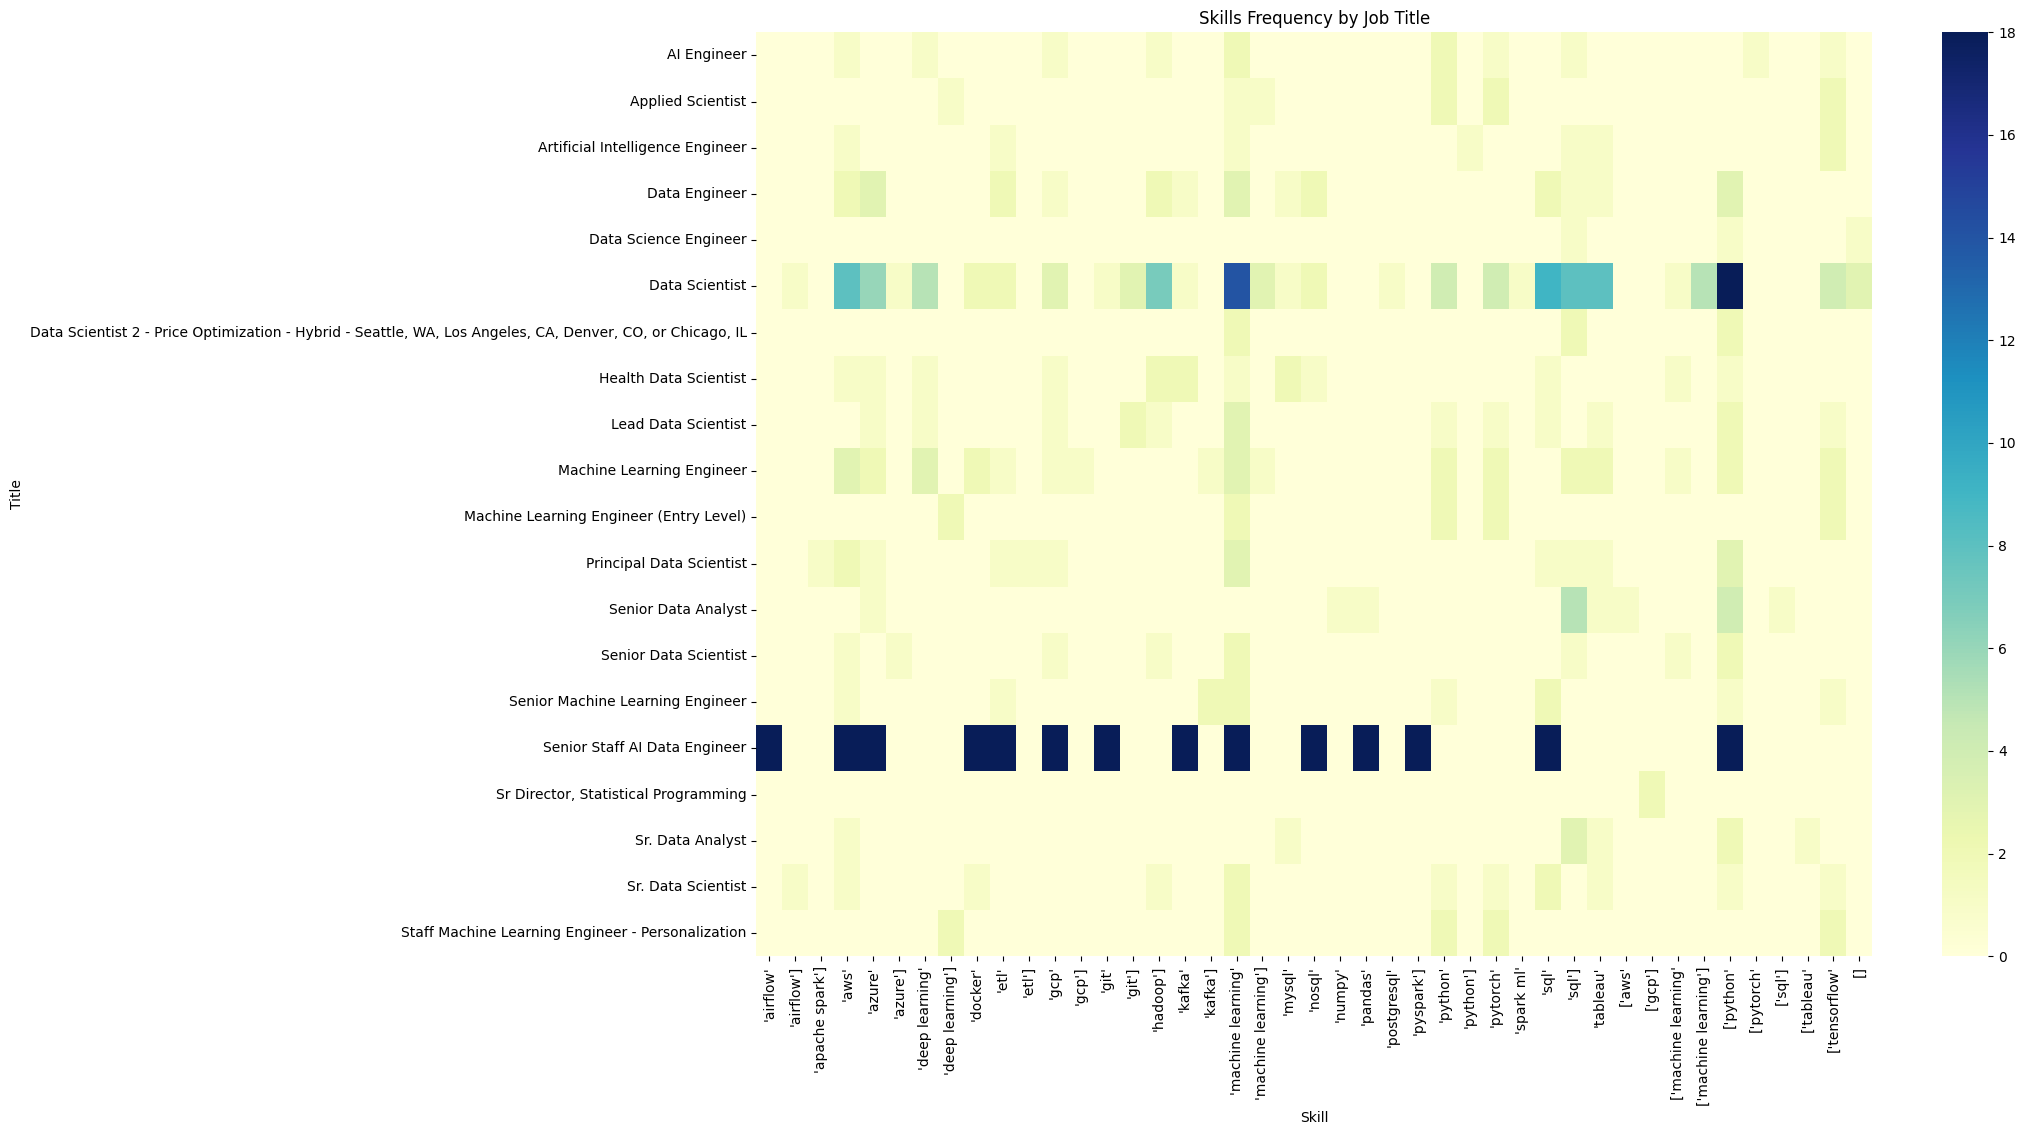

In [27]:
# Extract top 20 skills for a cleaner heatmap
top_20_titles = data['Title'].value_counts().nlargest(20).index
top_title_data = data[data['Title'].isin(top_20_titles)]

# Expand skills into individual rows
skills_data = []
for _, row in top_title_data.iterrows():
    for skill in row['Identified_Skills'].split(','):
        skills_data.append((row['Title'], skill.strip()))

skills_df = pd.DataFrame(skills_data, columns=['Title', 'Skill'])

# Create a pivot table
skills_matrix = pd.crosstab(skills_df['Title'], skills_df['Skill'])

# Plot the heatmap
plt.figure(figsize=(18, 12))
sns.heatmap(skills_matrix, cmap="YlGnBu", cbar=True)
plt.title("Skills Frequency by Job Title")
plt.show()